##Bibliotecas
 - Importando bibliotecas que vamos utilizar

In [1]:
#para nosso estudo de deep learnig vamos utilizar o tensorflow 
#esse modulo é uma plataforma de codigo aberto completa para trabalhar com machine learning 
#sua extensao denominada keras irá nos auxiliar a criar redes neurais
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

##Carregando Base
 - vamos utilizar a base fashion_mnist que esta contida no proprio keras
 - esta base possui imagens com classes de roupas

In [2]:
base = keras.datasets.fashion_mnist

In [3]:
#separando dados para treino e teste da rede 
((x_treino, y_treino), (x_teste, y_teste)) = base.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
#verificando as dimensoes da base
len(x_treino)
x_treino.shape

(60000, 28, 28)

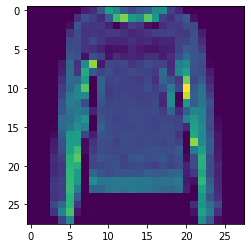

In [5]:
#verificando alguma imagem
plt.imshow(x_treino[400])

##Criando e treinando nossa rede neural

In [6]:
#subdividir as imagens em pixels faz com que o treino possua uma perda menor
x_treino = x_treino/255
x_teste = x_teste/255

In [7]:
#criando a rede neural
#uma rede neural trabalha com camadas e é possivel configurar cada uma delas
#a camada Flatten é precisso informar as dimenssoes da base 
#na camada Dense é onde acontece sinapses entre os neuronios é preciso informar a quantidade de neuronios e a funcao de ativacao que vao utilizar
#é valido resaltar que existem varias funcoes de ativacao, pois estas refletem em uma disposicao grafica para classificao dos dados
#logo para cada problema de deep learning podera ser preciso usar varias funcoes diferentes em varias camadas
#na sessao Dropout realizamos uma breve pausa antes da rede trocar de uma camada para a outra 
modelo = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(256, activation=tensorflow.nn.relu),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(128, activation=tensorflow.nn.relu),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(10, activation=tensorflow.nn.softmax)                          
])

In [8]:
#compilando o nosso otimizador e verificando historico de aprendizagem
#nessa etapa é onde escolhemos o algoritmo usado no processo de aprendizagem 
#assim como as funcoes de ativacao existem muitos otimizadores e cada caso pode ser melhor que o outro ems bases expecificas
#cada um dos hiperparametros já são ajustados na insancia da funcao optimizers, mas é sempre uma boa pratica alteralos para aprimorar o teinamento da rede
opt = keras.optimizers.Adam(learning_rate=0.0001)
modelo.compile(optimizer = opt , loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) 

historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split=0.2)
#abaixo nos vemos parametros de acertos e perdas ao longo de todas as epocas de trinamento que a rede fez
#é muito importante entender que nem sempre um treinamento com muitas epocas ou taxa de aprendizado alto irá ajudar a rede

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0601 - accuracy: 0.6431 - val_loss: 0.4919 - val_accuracy: 0.8264
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5257 - accuracy: 0.8163 - val_loss: 0.4364 - val_accuracy: 0.8470
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4523 - accuracy: 0.8400 - val_loss: 0.4007 - val_accuracy: 0.8574
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4124 - accuracy: 0.8531 - val_loss: 0.3795 - val_accuracy: 0.8643
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3877 - accuracy: 0.8640 - val_loss: 0.3630 - val_accuracy: 0.8705


##Verificando aprendizagem e perda durante todo o processo de aprendeizagem

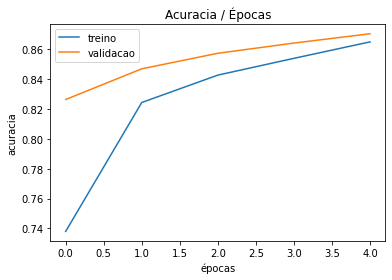

In [9]:
#neste grafico nos vamos comparar a taxa de acertos do treino e da validacao
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia / Épocas')
plt.xlabel('épocas')
plt.ylabel('acuracia')
plt.legend(['treino','validacao'])
#perceba que este grafico possui uma tendencia em aumentar com o numero de epocas e treinamentos
#mas para a analise deste, é importante nao deixar a linha de treino ultrapassar a linha de validacao

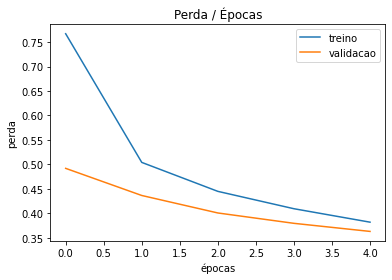

In [10]:
#já neste grafico nos comparamos a perda que o treino e a validacao possui em suas epocas 
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda / Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])
#ja neste grafico possui uma tendencia em diminiuir com o numero de epocas e treinamentos
#mas para a anlise deste, é importante nao deixar a linha de treino diminuir muito em relacao a linha de validacao

##Criando um segundo modelo 

In [11]:
#basicamente vou manter a mesma estrutura da rede
#pelo fato de que ja é possivel notar que ela possui um aprendizado significante
modelo_2 = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(256, activation=tensorflow.nn.relu),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(128, activation=tensorflow.nn.relu),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(10, activation=tensorflow.nn.softmax)                          
])

In [12]:
opt_2 = keras.optimizers.Adam(learning_rate=0.0001)
modelo_2.compile(optimizer = opt_2 , loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) 

historico_2 = modelo_2.fit(x_treino, y_treino, epochs = 25, validation_split=0.2)
#perceba agora que eu alterei o numero de epocas propositalmente
#a primeiro momento parece que essa rede aprendeu mais do que a anterior...
#pois suas taxas de aprendizados e perda mudaram 
#mas vamos analisar uns graficos para ver oq realmente aconteceu

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0867 - accuracy: 0.6345 - val_loss: 0.4916 - val_accuracy: 0.8321
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5180 - accuracy: 0.8201 - val_loss: 0.4249 - val_accuracy: 0.8501
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4555 - accuracy: 0.8417 - val_loss: 0.3943 - val_accuracy: 0.8580
Epoch 4/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4077 - accuracy: 0.8539 - val_loss: 0.3777 - val_accuracy: 0.8629
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3812 - accuracy: 0.8663 - val_loss: 0.3597 - val_accuracy: 0.8723
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3653 - accuracy: 0.8724 - val_loss: 0.3487 - val_accuracy: 0.8723
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3463 - accuracy: 0.8783 - val_loss: 0.3382 - val_accuracy:

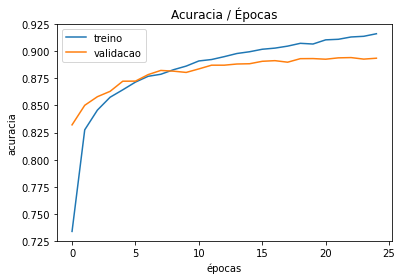

In [13]:
#grafica de comparacao acertos 
plt.plot(historico_2.history['accuracy'])
plt.plot(historico_2.history['val_accuracy'])
plt.title('Acuracia / Épocas')
plt.xlabel('épocas')
plt.ylabel('acuracia')
plt.legend(['treino','validacao'])
#aqui é possivel destacar um fenomeno interessante 
#no grafico nos conseguimos ver que a taxa de acertos no periodo de treino ultrapassou a taxa de acetos no periodo da validacao
#o nome desse fenomeno é chamado de overfitting 
#em outras palavras a rede já não esta mais aprendendo, ela decorou todo os dados presentes na base 
#isso remete a quando uma rede neural possui muito tempo de treinamento, taxa de aprendizado alta ou hiperparamentros mal configurados  

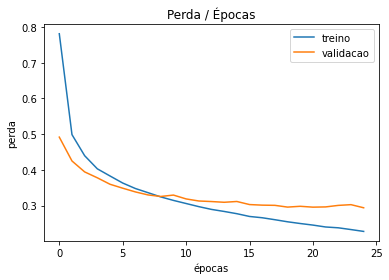

In [14]:
#grafica de comparacao acertos 
plt.plot(historico_2.history['loss'])
plt.plot(historico_2.history['val_loss'])
plt.title('Perda / Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])
#nesse grafico tambem encontramos o fenomeno de overfitting, ja que ela ja decorou todos os dados na base
#basicamente a rede ja perdeu a capacidade de aprender ... ela é agora uma especialista nessa base de dados
#caso esse modelo fosse exportado e aplicado em producao ele nao conseguiria classificar novos dados 